In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/housing-data/housing2 (1) (1).csv", sep = "," , encoding="utf-8")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                 NaN         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population households  median_income  median_house_value  \
0           322.0        126         8.3252              452600   
1          2401.0       1138         8.3014              358500   
2           496.0        177         7.2574              352100   
3           558.0        219         5.6431              341300   
4             NaN        259         3.8462              342200   
...           ...        ...            ...                 ...   
20635       845.0        330         1.5603               78100   
20636       356.0        114         2.5568               77100   
20637      1007.0        433         1.7000               92300   
20638       741.0        349         1.8672               84700   
20639      1387.0        530         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20640 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20382.000000  20640.000000   
mean    -119.569704     35.631861           28.676283   2635.763081   
std        2.003532      2.135952           12.589284   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population  median_income  median_house_value  
count    15758.000000  20596.000000   17873.000000        20640.000000  
mean       539.920104   1424.928724       3.939403       206855.816909  
std        419.834171   1132.237768       1.943517       115395.615874  
min          1.000000      3.000000       0.499900        14999.000000  
25%        296.000000    787.000000       2.598600       119600.000000  
50%        435.000000   1166.000000       3.587100       179700.000000  
75%        652.000000   1725.000000       4.830400       264725.000000  
max       6210.000000  35682.000000      15.000100       500001.000000

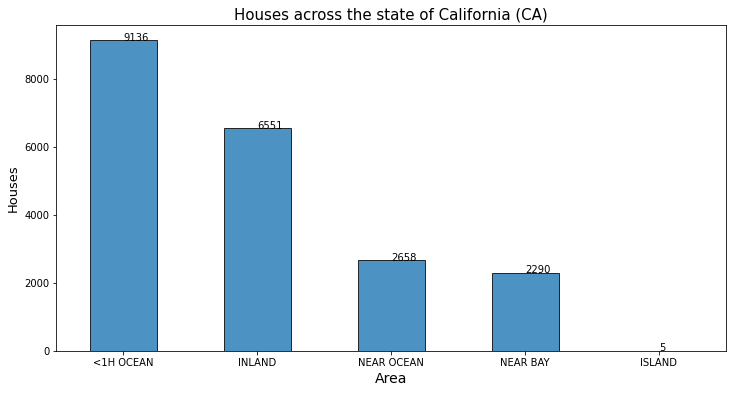

In [5]:
plt.figure(figsize=(12,6))
df['ocean_proximity'].value_counts().plot(kind='bar',edgecolor='k', alpha=0.8)
  
for index, value in enumerate(df['ocean_proximity'].value_counts()):
    plt.text(index, value, str(value))
plt.xlabel("Area", fontsize=14)
plt.ylabel("Houses", fontsize=13)
plt.xticks(rotation=0)
plt.title("Houses across the state of California (CA)", fontsize=15)
plt.show()

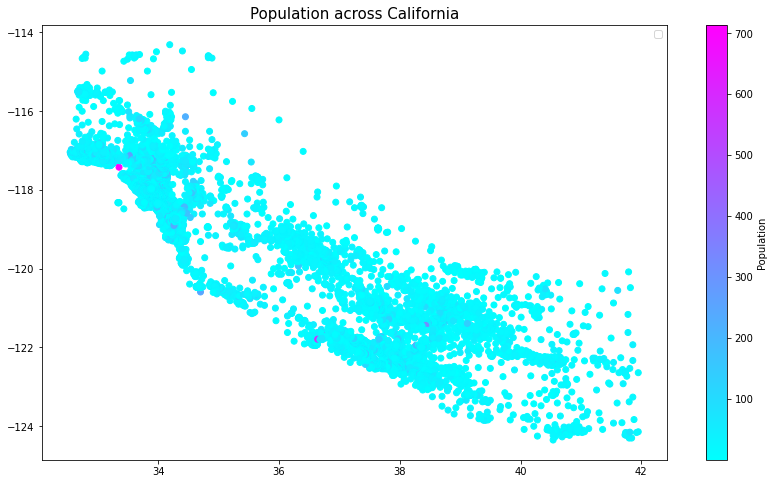

In [6]:
plt.figure(figsize=(14,8))
plt.scatter(df['latitude'],df['longitude'],c=df['population']/50, cmap='cool')
plt.colorbar().set_label("Population") 
plt.title('Population across California',fontsize=15)
plt.legend() 
plt.show()

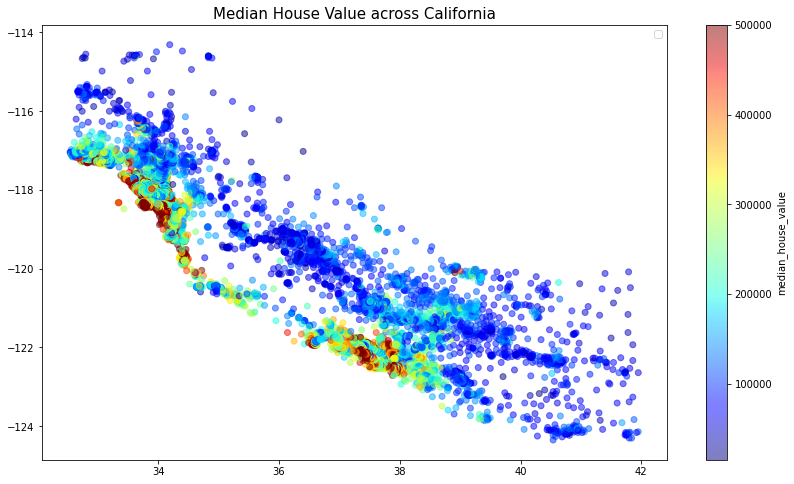

In [7]:
plt.figure(figsize=(14,8))
plt.scatter(df['latitude'],df['longitude'],c=df['median_house_value'], cmap='jet', alpha=0.5)
plt.colorbar().set_label("median_house_value") 
plt.title('Median House Value across California',fontsize=15)
plt.legend() 
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


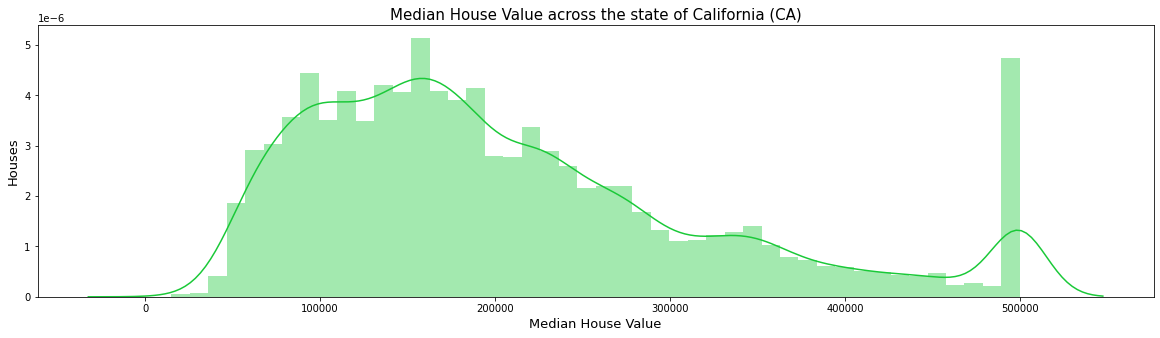

In [8]:
plt.figure(figsize=(20,5))
sns.set_color_codes(palette="bright")
sns.distplot(df['median_house_value'],color='g')
plt.title("Median House Value across the state of California (CA)", fontsize=15)
plt.xlabel("Median House Value", fontsize=13)
plt.ylabel("Houses", fontsize=13)
plt.show()

Hence, we find that more number of houses(9136) are located at a range that is less than 1 hour to the ocean. However, there is also a large number of homes inland away from the ocean. We also find that the price of homes near the ocean are compartively higher.

# Data Preprocessing

## Dealing with data types :

In [9]:
df['households'].value_counts()

no      3080
282       47
375       46
380       45
306       45
        ... 
1649       1
1879       1
1050       1
1119       1
1843       1
Name: households, Length: 1703, dtype: int64

In [10]:
df['households'].replace("no", np.nan , inplace=True)
df['households'] = pd.to_numeric(df['households'])

In [11]:
#df.drop(["ocean_proximity"] , axis = 1 , inplace = True)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
df_ohe = pd.DataFrame(ohe.fit_transform(df[['ocean_proximity']]))
df_ohe.index = df.index
df_num = df.drop(['ocean_proximity'], axis=1)
df = pd.concat([df_num, df_ohe], axis=1)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                 NaN         1627           280.0   

   population  households  median_income  median_house_value  gender    0  \
0       322.0       126.0         8.3252              452600    male  0.0   
1      2401.0      1138.0         8.3014              358500  female  0.0   
2       496.0       177.0         7.2574              352100    male  0.0   
3       558.0       219.0         5.6431              341300  female  0.0   
4         NaN       259.0         3.8462              342200    male  0.0   

     1    2    3    4  
0  0.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  
3  0.0  0.0  1.0  0.0  
4  0.0  0.0  1.0  0.0

In [13]:
df['gender'].value_counts()

female    8673
male      7947
Name: gender, dtype: int64

In [14]:
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df['gender'].value_counts()

0.0    8673
1.0    7947
Name: gender, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   gender              16620 non-null  float64
 10  0                   20640 non-null  float64
 11  1                   20640 non-null  float64
 12  2                   20640 non-null  float64
 13  3                   20640 non-null  float64
 14  4                   20640 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 2.4 MB


## Dealing with Out Liers : 

longitude                   AxesSubplot(0.125,0.125;0.133621x0.222059)
latitude                 AxesSubplot(0.285345,0.125;0.133621x0.222059)
housing_median_age        AxesSubplot(0.44569,0.125;0.133621x0.222059)
total_rooms              AxesSubplot(0.606034,0.125;0.133621x0.222059)
total_bedrooms           AxesSubplot(0.766379,0.125;0.133621x0.222059)
population               AxesSubplot(0.125,0.391471;0.133621x0.222059)
households            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
median_income          AxesSubplot(0.44569,0.391471;0.133621x0.222059)
median_house_value    AxesSubplot(0.606034,0.391471;0.133621x0.222059)
gender                AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

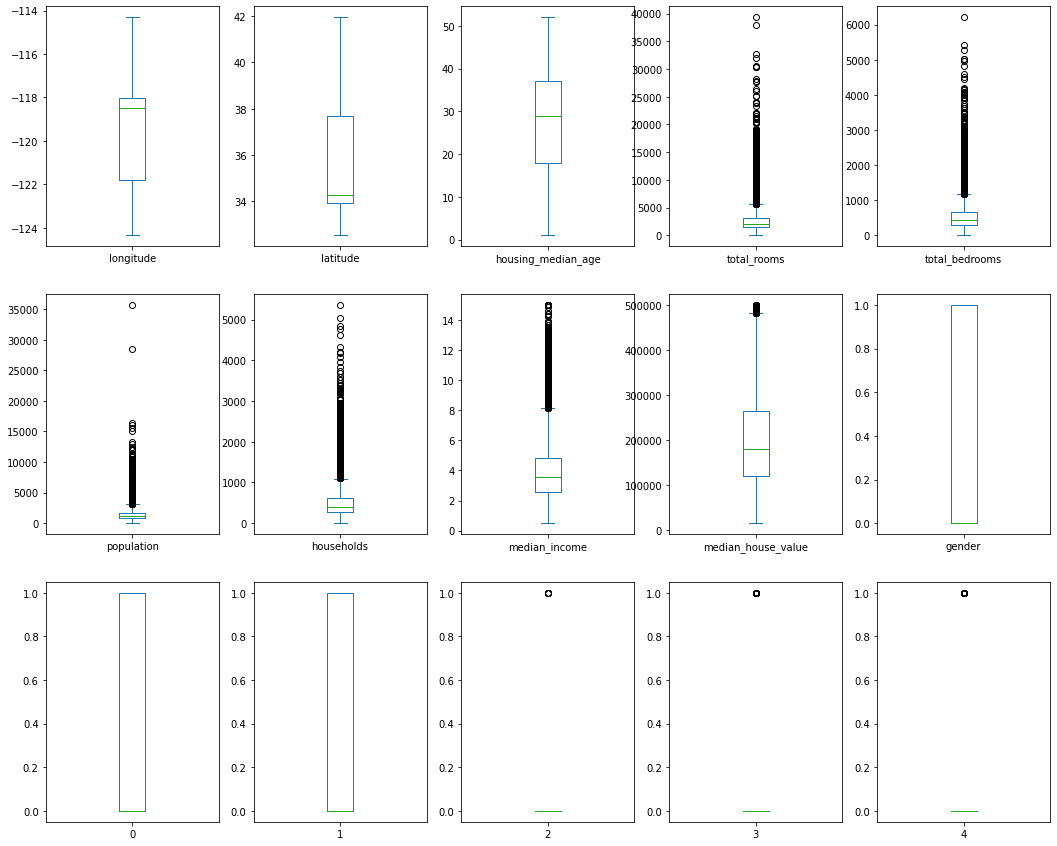

In [16]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,5))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

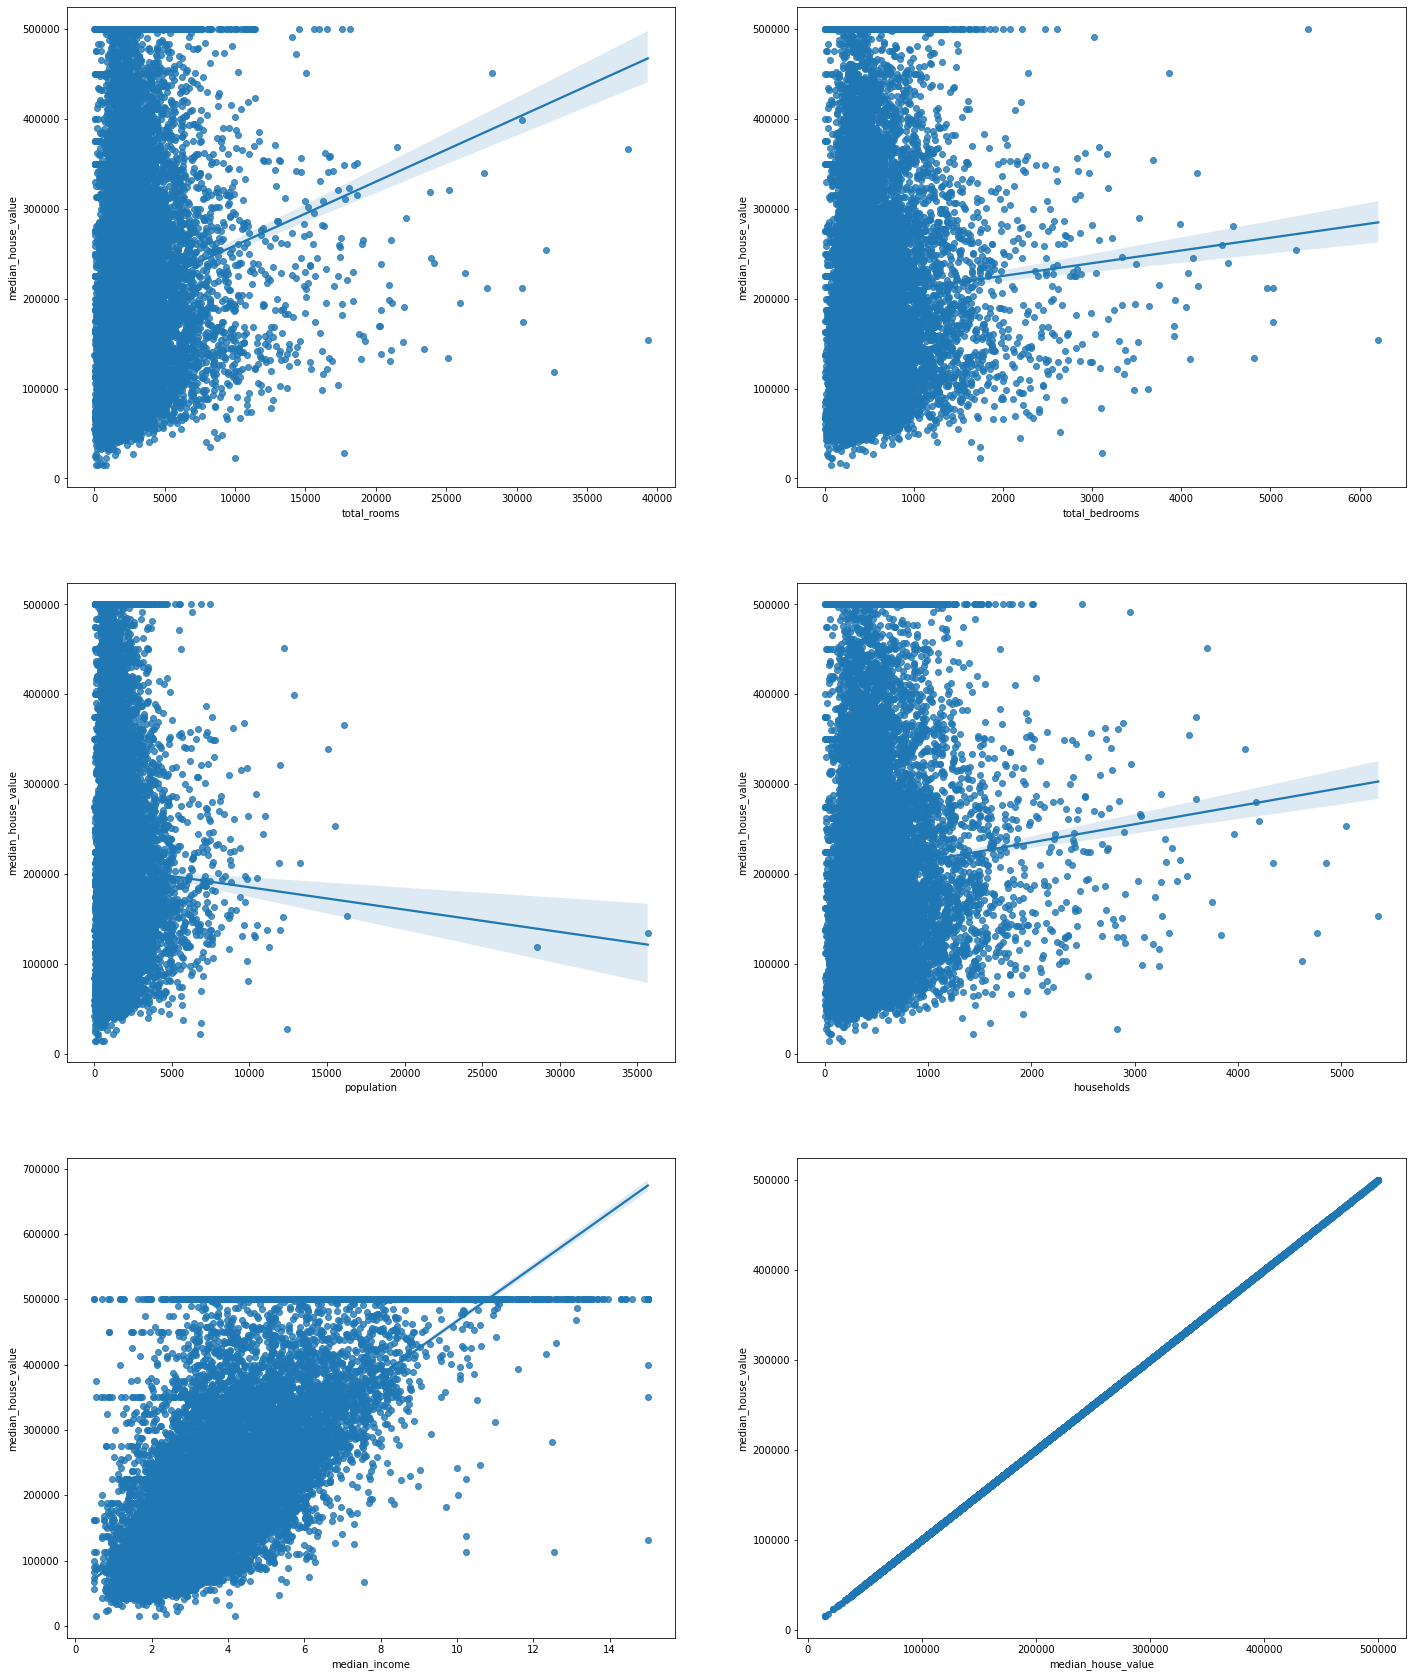

In [17]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(24,30)
_ = sns.regplot(df['total_rooms'], df['median_house_value'], ax=ax1)
_ = sns.regplot(df['total_bedrooms'], df['median_house_value'], ax=ax2)
_ = sns.regplot(df['population'], df['median_house_value'], ax=ax3)
_ = sns.regplot(df['households'], df['median_house_value'], ax=ax4)
_ = sns.regplot(df['median_income'], df['median_house_value'], ax=ax5)
_ = sns.regplot(df['median_house_value'], df['median_house_value'], ax=ax6)

In [18]:
df = df.drop(df[df['total_rooms']>8000].index)
df = df.drop(df[df['total_bedrooms']>1300].index)
df = df.drop(df[df['population']>4000].index)
df = df.drop(df[df['households']>1150].index)
df = df.drop(df[df['median_income']>9].index)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

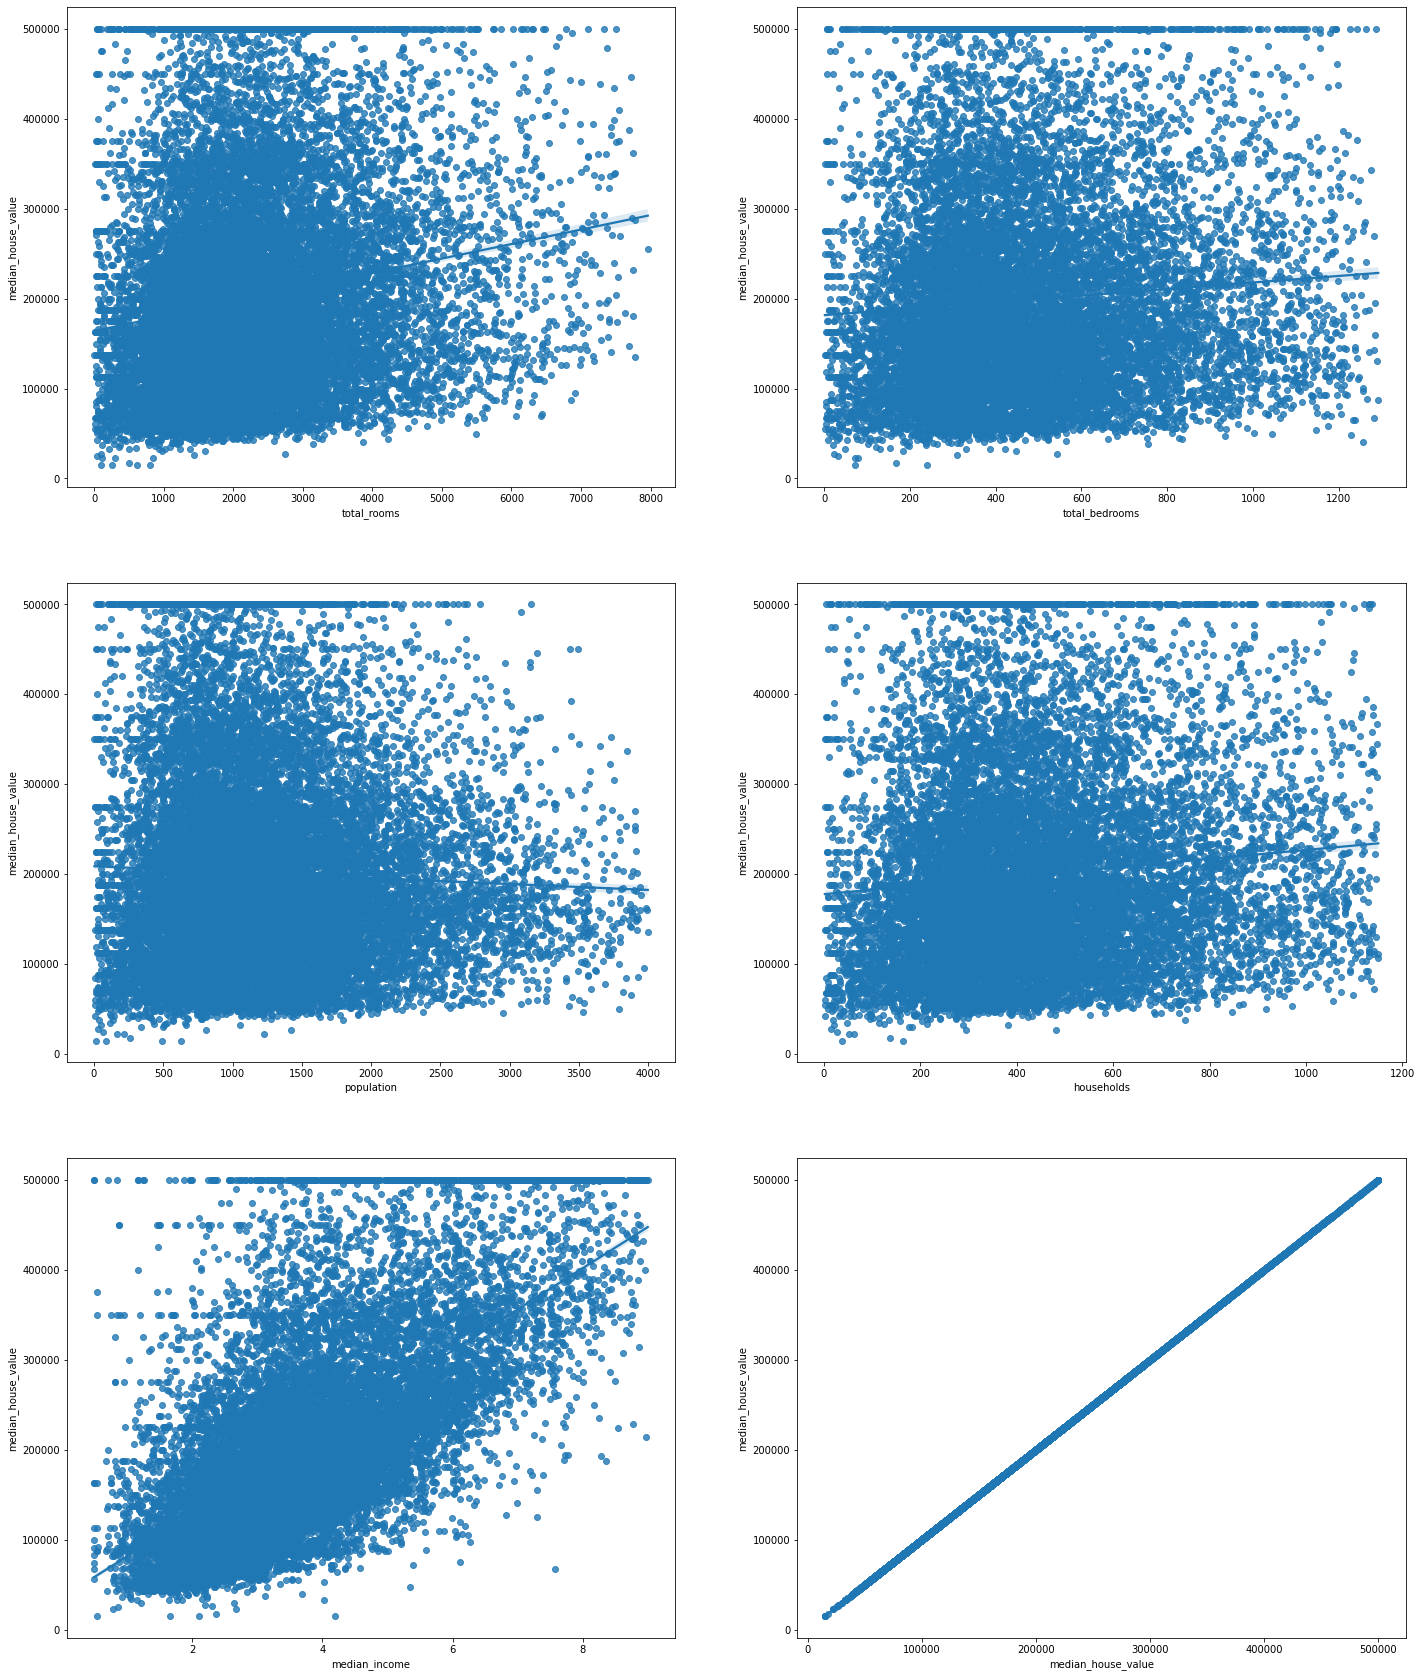

In [19]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(24,30)
_ = sns.regplot(df['total_rooms'], df['median_house_value'], ax=ax1)
_ = sns.regplot(df['total_bedrooms'], df['median_house_value'], ax=ax2)
_ = sns.regplot(df['population'], df['median_house_value'], ax=ax3)
_ = sns.regplot(df['households'], df['median_house_value'], ax=ax4)
_ = sns.regplot(df['median_income'], df['median_house_value'], ax=ax5)
_ = sns.regplot(df['median_house_value'], df['median_house_value'], ax=ax6)

longitude                   AxesSubplot(0.125,0.125;0.133621x0.222059)
latitude                 AxesSubplot(0.285345,0.125;0.133621x0.222059)
housing_median_age        AxesSubplot(0.44569,0.125;0.133621x0.222059)
total_rooms              AxesSubplot(0.606034,0.125;0.133621x0.222059)
total_bedrooms           AxesSubplot(0.766379,0.125;0.133621x0.222059)
population               AxesSubplot(0.125,0.391471;0.133621x0.222059)
households            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
median_income          AxesSubplot(0.44569,0.391471;0.133621x0.222059)
median_house_value    AxesSubplot(0.606034,0.391471;0.133621x0.222059)
gender                AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

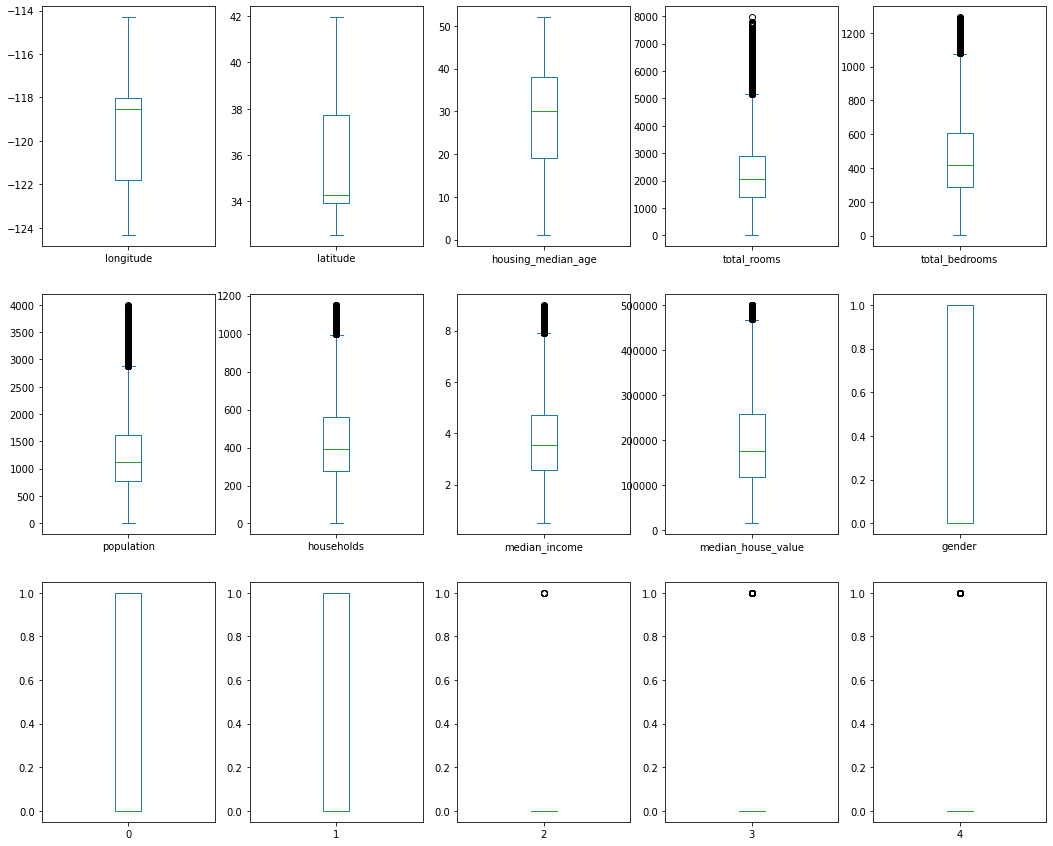

In [20]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,5))

In [21]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                 NaN         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  gender    0  \
0           322.0       126.0         8.3252              452600     1.0  0.0   
1          2401.0      1138.0         8.3014              358500     0.0  0.0   
2           496.0       177.0         7.2574              352100     1.0  0.0   
3           558.0       219.0         5.6431              341300     0.0  0.0   
4             NaN       259.0         3.8462              342200     1.0  0.0   
...           ...         ...            ...                 ...     ...  ...   
20635       845.0       330.0         1.5603               78100     0.0  0.0   
20636       356.0       114.0         2.5568               77100     1.0  0.0   
20637      1007.0       433.0         1.7000               92300     0.0  0.0   
20638       741.0       349.0         1.8672               84700     1.0  0.0   
20639      1387.0       530.0         2.3886               89400     0.0  0.0   

         1    2    3    4  
0      0.0  0.0  1.0  0.0  
1      0.0  0.0  1.0  0.0  
2      0.0  0.0  1.0  0.0  
3      0.0  0.0  1.0  0.0  
4      0.0  0.0  1.0  0.0  
...    ...  ...  ...  ...  
20635  1.0  0.0  0.0  0.0  
20636  1.0  0.0  0.0  0.0  
20637  1.0  0.0  0.0  0.0  
20638  1.0  0.0  0.0  0.0  
20639  1.0  0.0  0.0  0.0  

[19143 rows x 15 columns]

## Dealing with missing data :

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

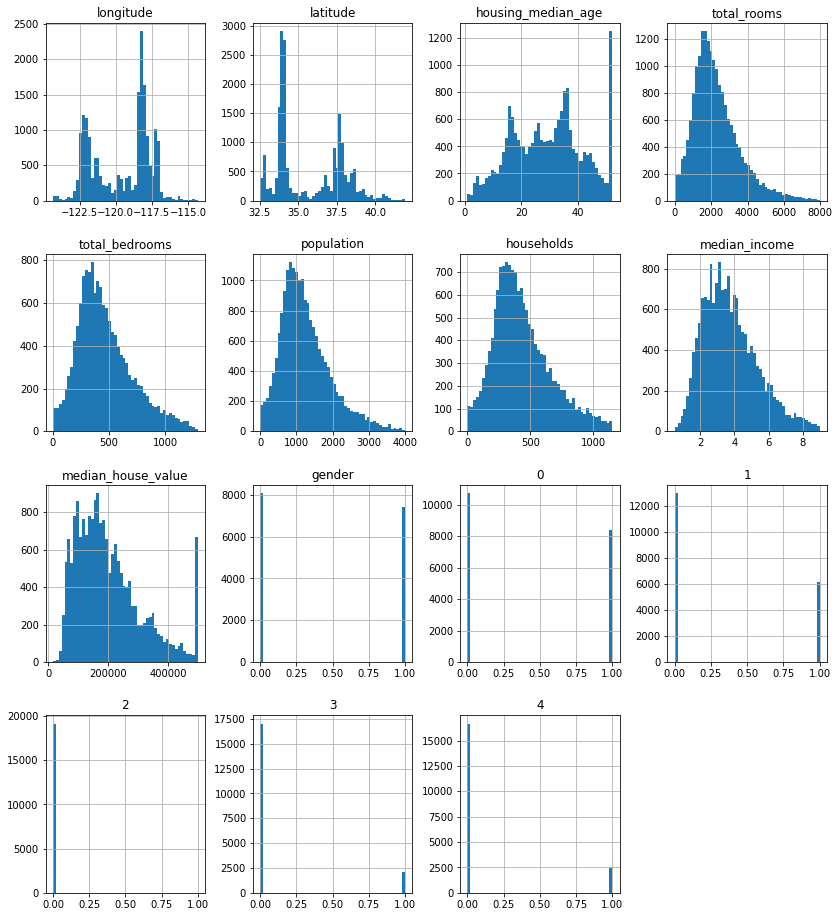

In [22]:
df.hist( bins=50, figsize=(14,16))

In [23]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age     242
total_rooms              0
total_bedrooms        4570
population              40
households            4120
median_income         2501
median_house_value       0
gender                3650
0                        0
1                        0
2                        0
3                        0
4                        0
dtype: int64

<AxesSubplot:>

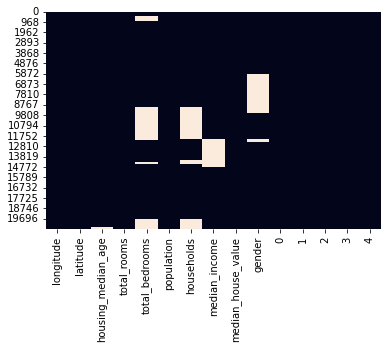

In [24]:
sns.heatmap(df.isnull(), cbar = False)

In [25]:
df = df.dropna(thresh=13)
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                 NaN         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  gender    0  \
0           322.0       126.0         8.3252              452600     1.0  0.0   
1          2401.0      1138.0         8.3014              358500     0.0  0.0   
2           496.0       177.0         7.2574              352100     1.0  0.0   
3           558.0       219.0         5.6431              341300     0.0  0.0   
4             NaN       259.0         3.8462              342200     1.0  0.0   
...           ...         ...            ...                 ...     ...  ...   
20635       845.0       330.0         1.5603               78100     0.0  0.0   
20636       356.0       114.0         2.5568               77100     1.0  0.0   
20637      1007.0       433.0         1.7000               92300     0.0  0.0   
20638       741.0       349.0         1.8672               84700     1.0  0.0   
20639      1387.0       530.0         2.3886               89400     0.0  0.0   

         1    2    3    4  
0      0.0  0.0  1.0  0.0  
1      0.0  0.0  1.0  0.0  
2      0.0  0.0  1.0  0.0  
3      0.0  0.0  1.0  0.0  
4      0.0  0.0  1.0  0.0  
...    ...  ...  ...  ...  
20635  1.0  0.0  0.0  0.0  
20636  1.0  0.0  0.0  0.0  
20637  1.0  0.0  0.0  0.0  
20638  1.0  0.0  0.0  0.0  
20639  1.0  0.0  0.0  0.0  

[18167 rows x 15 columns]

In [26]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age      37
total_rooms              0
total_bedrooms        3602
population              33
households            3189
median_income         2245
median_house_value       0
gender                3077
0                        0
1                        0
2                        0
3                        0
4                        0
dtype: int64

In [27]:
fill_list = df['housing_median_age']
df['housing_median_age'] = df['housing_median_age'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
fill_list = df['total_bedrooms']
df['total_bedrooms'] = df['total_bedrooms'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
fill_list = df['population']
df['population'] = df['population'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
fill_list = df['households']
df['households'] = df['households'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
fill_list = df['median_income']
df['median_income'] = df['median_income'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
fill_list = df['gender']
df['gender'] = df['gender'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        1324
population               0
households            1134
median_income          280
median_house_value       0
gender                 509
0                        0
1                        0
2                        0
3                        0
4                        0
dtype: int64

In [34]:
df.dropna(inplace=True)
df.isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
gender                0
0                     0
1                     0
2                     0
3                     0
4                     0
dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

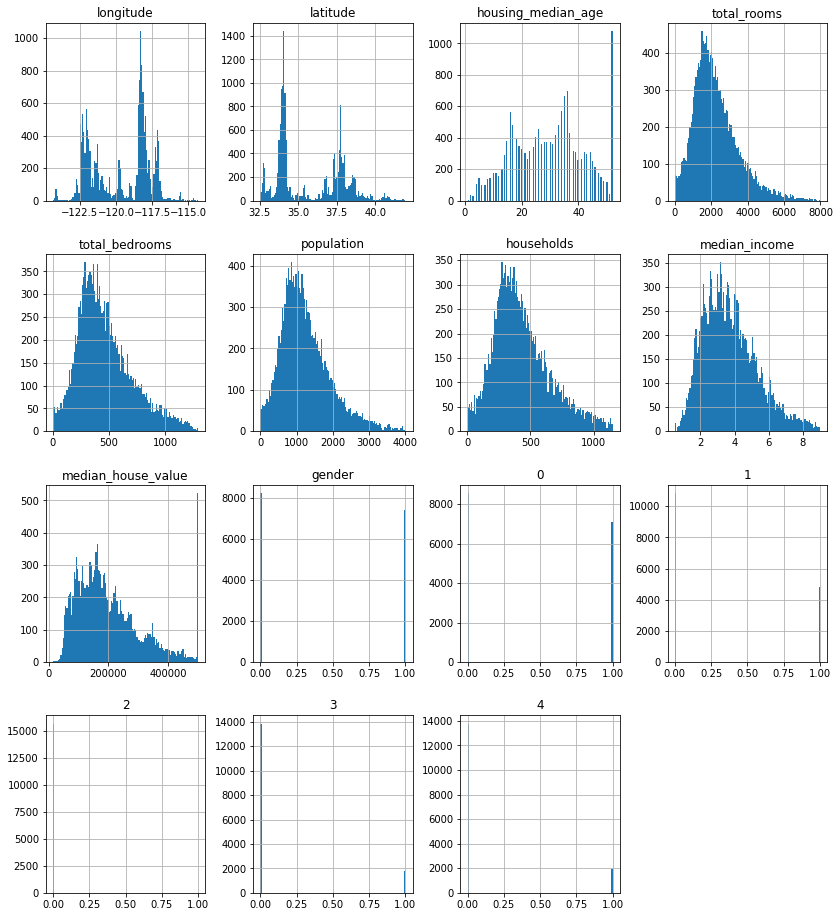

In [35]:
df.hist( bins=120, figsize=(14,16))

## Dealing with duplicates :

In [36]:
len(df)-len(df.drop_duplicates())

0

In [37]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                39.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  gender    0  \
0           322.0       126.0         8.3252              452600     1.0  0.0   
1          2401.0      1138.0         8.3014              358500     0.0  0.0   
2           496.0       177.0         7.2574              352100     1.0  0.0   
3           558.0       219.0         5.6431              341300     0.0  0.0   
4           636.0       259.0         3.8462              342200     1.0  0.0   
...           ...         ...            ...                 ...     ...  ...   
20635       845.0       330.0         1.5603               78100     0.0  0.0   
20636       356.0       114.0         2.5568               77100     1.0  0.0   
20637      1007.0       433.0         1.7000               92300     0.0  0.0   
20638       741.0       349.0         1.8672               84700     1.0  0.0   
20639      1387.0       530.0         2.3886               89400     0.0  0.0   

         1    2    3    4  
0      0.0  0.0  1.0  0.0  
1      0.0  0.0  1.0  0.0  
2      0.0  0.0  1.0  0.0  
3      0.0  0.0  1.0  0.0  
4      0.0  0.0  1.0  0.0  
...    ...  ...  ...  ...  
20635  1.0  0.0  0.0  0.0  
20636  1.0  0.0  0.0  0.0  
20637  1.0  0.0  0.0  0.0  
20638  1.0  0.0  0.0  0.0  
20639  1.0  0.0  0.0  0.0  

[15674 rows x 15 columns]

<AxesSubplot:>

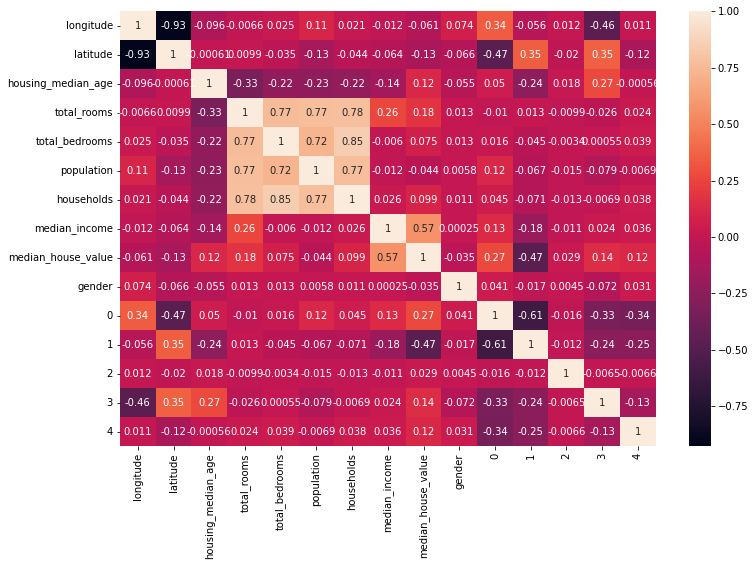

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap( df.corr(), annot = True)

# Modeling :

In [39]:
X = df.drop("median_house_value" , axis = 1).values
y = df['median_house_value'].values

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [41]:
X_train.shape

(11755, 14)

In [42]:
X_test.shape

(3919, 14)

In [43]:
y_train.shape

(11755,)

In [44]:
y_test.shape

(3919,)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
lr.coef_

array([-3.35627366e+04, -3.21295262e+04,  9.81962214e+02,  2.39363876e+01,
        2.53915792e+01, -6.16814425e+01,  5.89677090e+01,  2.89288285e+04,
       -8.19477770e+03, -1.28606234e+04, -6.64376962e+04,  1.34118423e+05,
       -2.98197750e+04, -2.50003288e+04])

In [47]:
lr.intercept_

-2783333.2681836104

In [48]:
lr.score(X_train,y_train)

0.5442452382812268

In [49]:
lr.score(X_test,y_test)

0.5617843047667015

In [50]:
y_pred = lr.predict(X_test)
y_pred

array([229918.92125326, 212818.48633994, 169666.08270116, ...,
        94574.81120716, 203406.08549219, 132765.80237507])

In [51]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,y_train)

Ridge()

In [52]:
rid.score(X_train,y_train)

0.5442187372866635

In [53]:
rid.score(X_test,y_test)

0.5618181658430791

In [54]:
y_pred2 = rid.predict(X_test)
y_pred2

array([229953.26874438, 212780.67603863, 169650.11314952, ...,
        94596.68115189, 203432.88765733, 132798.87907966])

In [55]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)
r2

0.5617843047667015

In [56]:
r22 = r2_score(y_test , y_pred2)
r22

0.5618181658430791

In [57]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1465.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:02:01   Log-Likelihood:            -1.9789e+05
No. Observations:               15674   AIC:                         3.958e+05
Df Residuals:                   15660   BIC:                         3.959e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.338e+06   8.65e+04    -27.011      0.0